In [467]:
import pandas as pd
import geopandas as gpd
import os
import pylab as plt
import emdat_df
reload(emdat_df)
from emdat_df import emdat
import utils
reload(utils)
from utils import get_GNI, get_pop
from importlib import reload
import datetime
import wbdata
%pylab inline

data = os.getenv('data')

Populating the interactive namespace from numpy and matplotlib


/home/nicholasjones/miniconda3/envs/GPD3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 1. Load downloaded Excel file as a PyEmdat object

In [456]:
ED = emdat((data + '/emdat_1960.xlsx'))

squawk


## 2. Number of events for selected countries, dates and hazards

In [367]:
df = ED.disaster_count_timeseries(1960, 2000, countries = [], disastertype = ['Storm','Flood', 'Earthquake','Volcanic activity','Landslide'])
df.head(2)

disaster_type,Earthquake,Flood,Landslide,Storm,Volcanic activity
year,,,,,
1961-01-01,3.0,8.0,2.0,14.0,0.0
1962-01-01,4.0,8.0,2.0,13.0,0.0


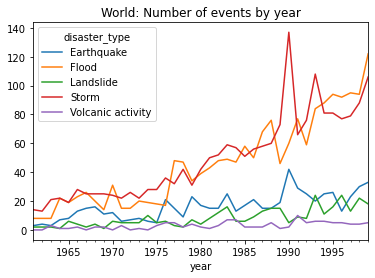

In [96]:
df.plot(title = 'World: Number of events by year');

## 2. Disaster statistics for a single period (eg. sum of damages from year x to y)

In [97]:
result = ED.disaster_stats_total_for_period(1990, 2000, countries = ['Bangladesh'], disastertype = ['Storm'], stats = ['total_affected'])
print("Total people affected by storm in Bangladesh 1990-2000: {:,.0f}".format(result))

Total people affected by storm in Bangladesh 1990-2000: 23,603,895


## 3. Single period grouped by disaster types

In [188]:
result = ED.disaster_stats_series(1980, 2020, countries = ['Pakistan'], disastertype = [], stats = ['total_damages'])
result

disaster_type
Drought                     247000.0
Earthquake                 5348500.0
Epidemic                         0.0
Extreme temperature          18000.0
Flood                     19911378.0
Industrial accident         179080.0
Insect infestation               0.0
Landslide                    18000.0
Mass movement (dry)              0.0
Miscellaneous accident       22000.0
Storm                      1710936.0
Transport accident               0.0
Name: total_damages, dtype: float64

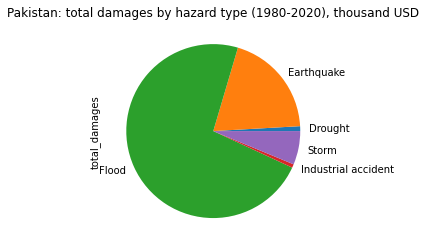

In [190]:
result[result>100000].plot(kind = 'pie', y='total_damages', figsize =[4,4])
plt.title('Pakistan: total damages by hazard type (1980-2020), thousand USD');

## 4. Time series grouped by hazard (for selected countries & dates)

['Mexico']


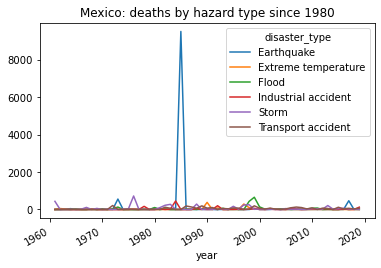

In [426]:
df = ED.disaster_stats_timeseries(1960, 2020, 'Mexico','all','deaths')
cols_over_1000 = [column for column in df.columns if df[column].sum() > 1000]
df[cols_over_1000].plot(title = 'Mexico: deaths by hazard type since 1980');

## 5. Time series grouped by country (for selected dates & hazard)

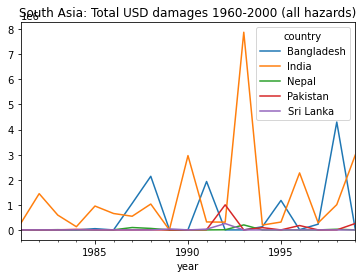

In [457]:
df = ED.country_stats_timeseries(1980, 2000, ['Bangladesh','Nepal', 'Pakistan', 'India', 'Sri Lanka'],'all','total_damages')
df.plot(title = 'South Asia: Total USD damages 1960-2000 (all hazards)');

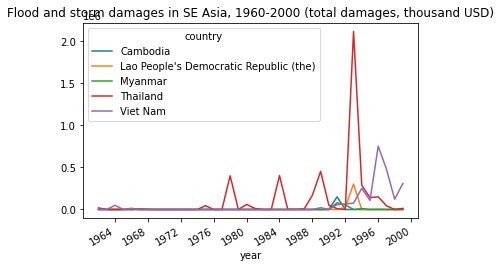

In [459]:
df = ED.country_stats_timeseries(1960, 2000, ["Lao People's Democratic Republic (the)",'Cambodia','Thailand','Viet Nam','Myanmar'],['Flood','Storm'],'total_damages')
df.plot(title = 'Flood and storm damages in SE Asia, 1960-2000 (total damages, thousand USD)');

## 6. Get income and GNI for selected years & countries

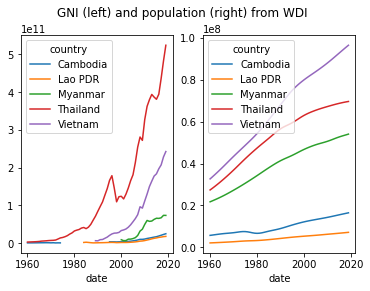

In [489]:
df_gni = get_GNI(df)
df_pop = get_pop(df)

f, (axes) = plt.subplots(nrows=1,ncols=2)
df_gni.plot(ax = axes[0])
df_pop.plot(ax = axes[1])
plt.suptitle('GNI (left) and population (right) from WDI');

In [488]:
df_gni[df_gni.index > '1980']

country,Cambodia,Lao PDR,Myanmar,Thailand,Vietnam
date,,,,,
1981,NaN,NaN,NaN,3.429456e+10,NaN
1982,NaN,NaN,NaN,3.602797e+10,NaN
1983,NaN,NaN,NaN,3.975148e+10,NaN
1984,NaN,1.757143e+09,NaN,4.131319e+10,NaN
1985,NaN,2.366667e+09,NaN,3.825258e+10,NaN
1986,NaN,1.776842e+09,NaN,4.224359e+10,NaN
1987,NaN,1.087273e+09,NaN,4.966485e+10,NaN
1988,NaN,5.989613e+08,NaN,6.068791e+10,NaN
1989,NaN,7.140468e+08,NaN,7.133001e+10,6.330716e+09


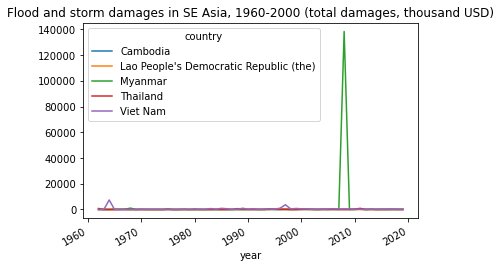

In [492]:
SE_Asia_flood_storm_deaths_since_1960 = ED.country_stats_timeseries(1960, 2020, ["Lao People's Democratic Republic (the)",'Cambodia','Thailand','Viet Nam','Myanmar'],['Flood','Storm'],'deaths')
SE_Asia_flood_storm_deaths_since_1960.plot(title = 'Flood and storm damages in SE Asia, 1960-2000 (total damages, thousand USD)');

<AxesSubplot:>

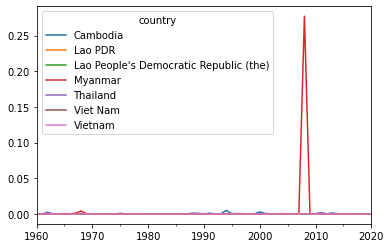

In [500]:
SE_Asia_pop = get_pop(SE_Asia_flood_storm_deaths_since_1960)
SE_Asia_flood_storm_deaths_since_1960_percent_pop = SE_Asia_flood_storm_deaths_since_1960 / SE_Asia_pop * 100
SE_Asia_flood_storm_deaths_since_1960_percent_pop.fillna(0, inplace=True)
SE_Asia_flood_storm_deaths_since_1960_percent_pop.plot()

In [496]:
SE_Asia_flood_storm_deaths_since_1960

country,Cambodia,Lao People's Democratic Republic (the),Myanmar,Thailand,Viet Nam
year,,,,,
1962-01-01,0.0,0.0,0.0,769.0,0.0
1963-01-01,0.0,0.0,0.0,0.0,0.0
1964-01-01,0.0,0.0,0.0,0.0,7400.0
1965-01-01,0.0,0.0,134.0,0.0,0.0
1966-01-01,0.0,300.0,0.0,6.0,31.0
1967-01-01,0.0,0.0,278.0,0.0,0.0
1968-01-01,0.0,2.0,1070.0,0.0,0.0
1969-01-01,0.0,0.0,0.0,0.0,0.0
1970-01-01,0.0,0.0,90.0,0.0,237.0


In [495]:
SE_Asia_pop

country,Cambodia,Lao PDR,Myanmar,Thailand,Vietnam
date,,,,,
1960,5722370.0,2120898.0,21736942.0,27397207.0,32670039.0
1961,5872966.0,2170344.0,22211624.0,28224187.0,33666110.0
1962,6028431.0,2221125.0,22697667.0,29080938.0,34683407.0
1963,6183584.0,2273351.0,23198241.0,29966865.0,35721217.0
1964,6331449.0,2327137.0,23717788.0,30881138.0,36779999.0
...,...,...,...,...,...
2016,15766293.0,6845846.0,53045226.0,68971331.0,93638724.0
2017,16009414.0,6953035.0,53382581.0,69209858.0,94596642.0
2018,16249798.0,7061507.0,53708395.0,69428524.0,95540395.0


In [331]:
def get_population(df):
    # Takes a dataframe where the columns are country names and the rows are dates
    # Returns GNI in current US dollars from the WDI
    countries = df.columns
    date_tuple = df.index.min(),df.index.max()
    ISOs = [ISO_dict[country] for country in countries]
    indicators = {'NSP.POP.TOTL':'population'}
    result = wbdata.get_dataframe(indicators,country=ISOs)
    result=result['population'].unstack().T
    return(result)

In [332]:
df_pop = get_GNI(df)
df_pop.head(2)

country,Cambodia,Lao PDR,Myanmar,Thailand,Vietnam
date,,,,,
1960,6.376040e+08,NaN,NaN,2.753694e+09,NaN
1961,6.433224e+08,NaN,NaN,3.026773e+09,NaN


<AxesSubplot:xlabel='date'>

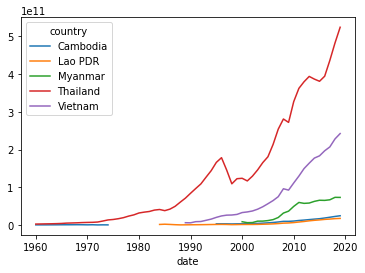

In [333]:
df_pop.plot()   # NB missing data

In [274]:
mydict = {}
for item in ED.df.country.unique():
    try:
        mydict[item] = ED.df.ISO[ED.df.country == item].reset_index(drop=True)[0]
    except:
        pass
pd.Series(mydict).rename('ISO').to_csv(data+'/ISO_codes.csv')

In [279]:
ISO_dict = pd.read_csv(data+'/ISO_codes.csv',index_col=[0]).ISO.to_dict()

In [238]:
ED.df

,dis_no,year,Seq,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,Disaster Subsubtype,event_name,Entry Criteria,...,End Day,deaths,injured,affected,homeless,total_affected,reconstruction_costs,insured_damages,total_damages,CPI
0,1960-0013-CHL,1960-01-01,13,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,Kill,...,22.0,6000.0,3000.0,2000000.0,NaN,2003000.0,NaN,NaN,550000.0,11.568216
1,1960-0026-AIA,1960-01-01,26,Natural,Meteorological,Storm,Tropical cyclone,NaN,Donna,Affect,...,4.0,5.0,250.0,NaN,1000.0,1250.0,NaN,NaN,35000.0,11.568216
2,1960-0025-ANT,1960-01-01,25,Natural,Meteorological,Storm,Tropical cyclone,NaN,Donna,OFDA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.568216
3,1960-0024-ATG,1960-01-01,24,Natural,Meteorological,Storm,Tropical cyclone,NaN,Donna,OFDA,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.568216
4,1960-0030-BGD,1960-01-01,30,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Kill,...,9.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.568216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23384,2020-0233-COD,2020-01-01,233,Technological,Technological,Transport accident,Water,NaN,NaN,Kill,...,8.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23385,2020-0439-COD,2020-01-01,439,Technological,Technological,Industrial accident,Collapse,NaN,Gold mine,Kill,...,11.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23386,2020-0175-COD,2020-01-01,175,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,18.0,52.0,80.0,92500.0,NaN,92580.0,NaN,NaN,NaN,NaN
23387,2020-0433-MYT,2020-01-01,433,Technological,Technological,Transport accident,Water,NaN,Migrants,Kill,...,24.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
